Visualize a subset of the OCT dataset provided by [tia16].

### References

[tia16]  Tian et al. "Performance evaluation of automated segmentation software on optical coherence tomography volume data," J. Biophotonics, 2016.   http://onlinelibrary.wiley.com/doi/10.1002/jbio.201500239/full

In [101]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import h5py

import numpy as np
import pylab as plt
from scipy.io import loadmat

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
def render_slice(x, y):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'orange', 'tan'] * 2
    layers = []
    
    height = float(x.shape[0])
    width = float(x.shape[1])
    
    fig = plt.figure(figsize=(8,8))

    plt.imshow(x, interpolation='none', cmap='bone')
    for ii in range(y.shape[0]):
        if np.all(y[ii,:] > 0):
            plt.plot(np.arange(y.shape[1]), y[ii,:], colors[ii])
            layers.append(ii)
    
    plt.xlim([0, width]); plt.ylim([height,0])
    plt.axis('off')
    plt.legend(layers, loc='lower right')

X:  (496, 768, 50) uint8 0 255
Y:  (9, 768, 50) float64


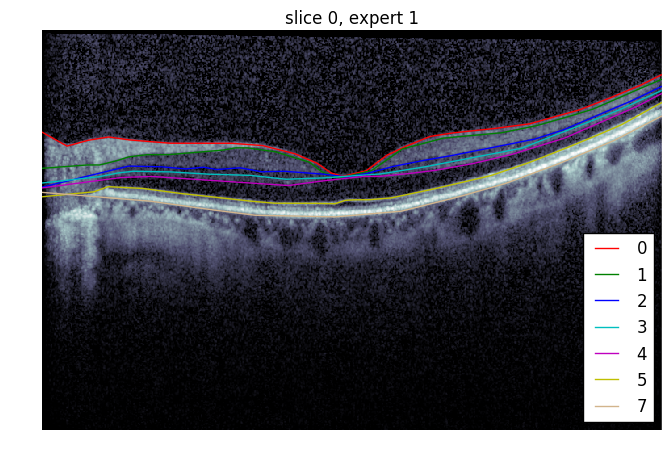

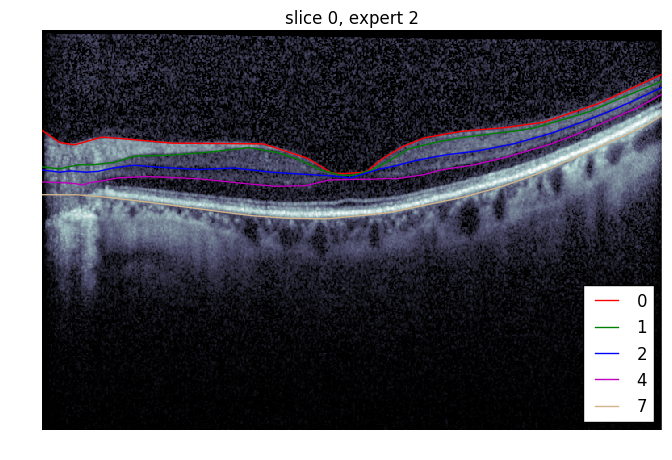

In [102]:
mat_file = '/Users/pekalmj1/Data/Tian_OCT/jbio201500239-sup-0003-Data-S1.mat'

mf = loadmat(mat_file)
X = mf['volumedata']
Y1 = mf['O1']
Y2 = mf['O2']

print('X: ', X.shape, X.dtype, np.min(X), np.max(X))
print('Y: ', Y1.shape, Y1.dtype)

render_slice(X[:,:,0], Y1[:,:,0])
plt.title('slice 0, expert 1')
plt.show()

render_slice(X[:,:,0], Y2[:,:,0])
plt.title('slice 0, expert 2')
plt.show()